In [87]:
# Load the discharge_df
# Preparing data for model fitting phase (Box-Jenkins: Estimation)

import pandas as pd

discharge_df = pd.read_csv('../data/discharge_df.csv')
discharge_df['start_datetime'] = pd.to_datetime(discharge_df['start_datetime'])
discharge_df['Capacity'] = pd.to_numeric(discharge_df['Capacity'], errors='coerce')


In [88]:
# Import modeling and diagnostic libraries

import matplotlib.pyplot as plt
import joblib
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm


In [89]:
# Pick the same sample batteries

sample_batteries = discharge_df['battery_id'].unique()[:4]


In [90]:
# Define manual (p,d,q) orders based on ACF/PACF

manual_orders = {
    'B0005': (1,0,1),
    'B0006': (1,0,1),
    'B0007': (1,0,1),
    'B0018': (3,0,2)
}


In [91]:
# Function to fit ARIMA model and save it
# Box-Jenkins: Model Estimation phase

def fit_arima_model(series, order, battery_id):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    print(f"Model fitted for {battery_id}")
    joblib.dump(model_fit, f'../results/models/{battery_id}_arima.pkl')
    print(f"Model saved for {battery_id}")
    return model_fit


In [92]:
# Function to plot residual diagnostics
# Box-Jenkins: Diagnostic checking of model errors

def plot_residuals_diagnostics(model_fit, battery_id):
    residuals = model_fit.resid
    
    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    
    axes[0].plot(residuals)
    axes[0].set_title(f'Residuals Time Plot - {battery_id}')
    
    axes[1].hist(residuals, bins=30, edgecolor='black')
    axes[1].set_title(f'Residuals Histogram - {battery_id}')
    
    sm.qqplot(residuals, line='s', ax=axes[2])
    axes[2].set_title(f'Q-Q Plot - {battery_id}')
    
    plt.tight_layout()
    plt.show()


In [99]:
# Function to perform residual normality and autocorrelation tests

def residual_tests(model_fit, battery_id):
    residuals = model_fit.resid.dropna()
    
    print(f"\nResidual Tests for {battery_id}")
    
    # Shapiro-Wilk Test for Normality
    stat, p = shapiro(residuals)
    if p > 0.05:
        print("Residuals look Gaussian (Shapiro p > 0.05)")
    else:
        print("Residuals NOT Gaussian (Shapiro p < 0.05)")
    
    # Ljung-Box Test for Autocorrelation
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_pvalue = lb_test['lb_pvalue'].values[0]
    
    if lb_pvalue > 0.05:
        print("Residuals are independent (Ljung-Box p > 0.05)")
        print(lb_pvalue)
    else:
        print("Residuals show autocorrelation (Ljung-Box p < 0.05)")
        print(lb_pvalue)


In [100]:
discharge_df['capacity_diff'] = discharge_df.groupby('battery_id')['Capacity'].diff()



Fitting ARIMA(1, 0, 1) for Battery B0005
Model fitted for B0005
Model saved for B0005


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

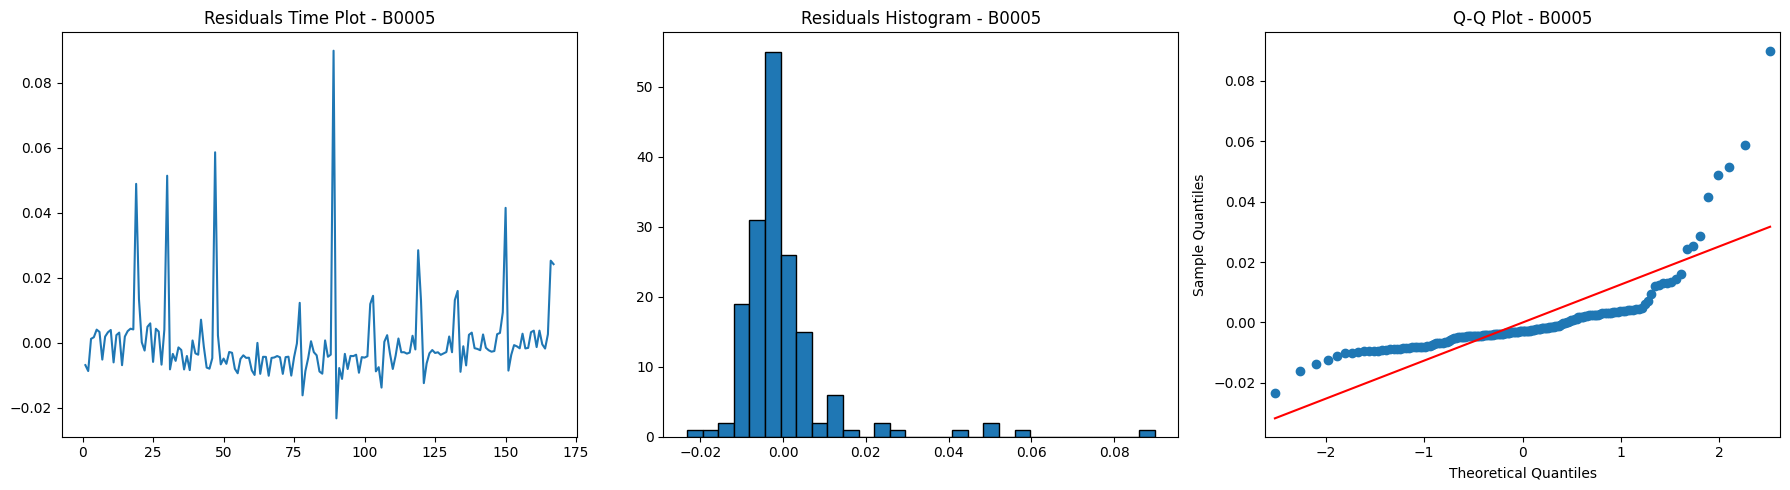


Residual Tests for B0005
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)
0.9983272825914119

Fitting ARIMA(1, 0, 1) for Battery B0006
Model fitted for B0006
Model saved for B0006


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

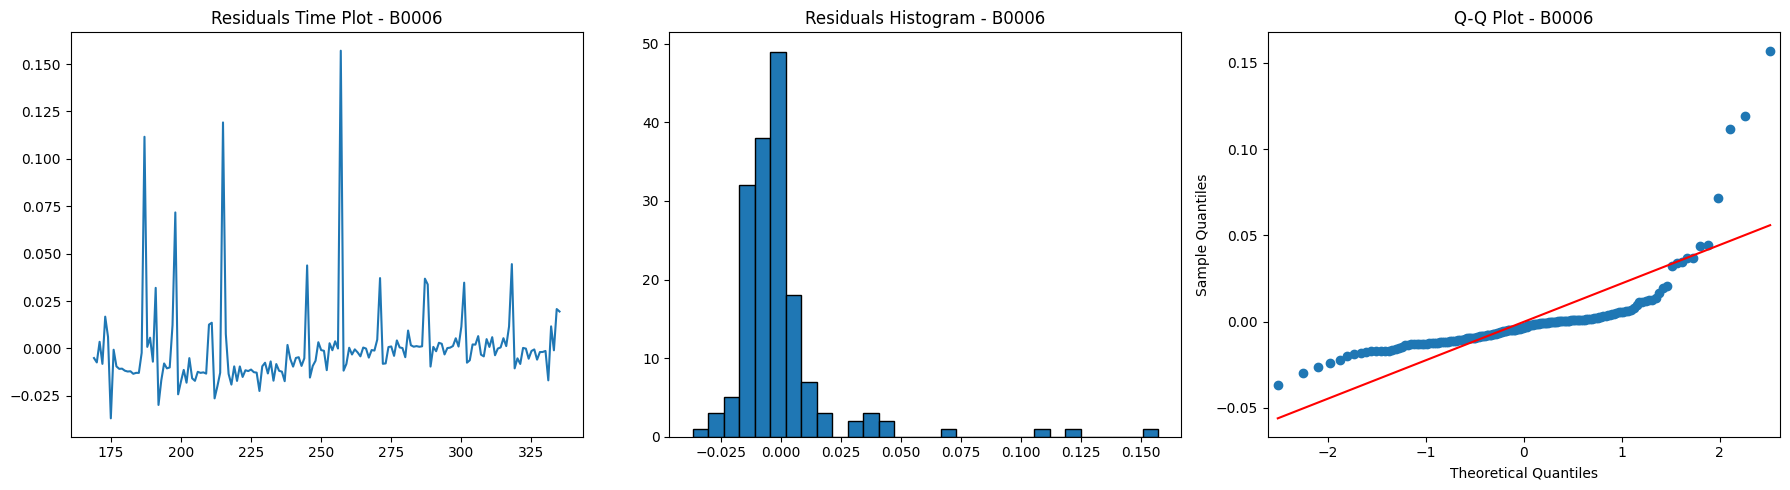


Residual Tests for B0006
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)
0.9924881538477925

Fitting ARIMA(1, 0, 1) for Battery B0007


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

Model fitted for B0007
Model saved for B0007


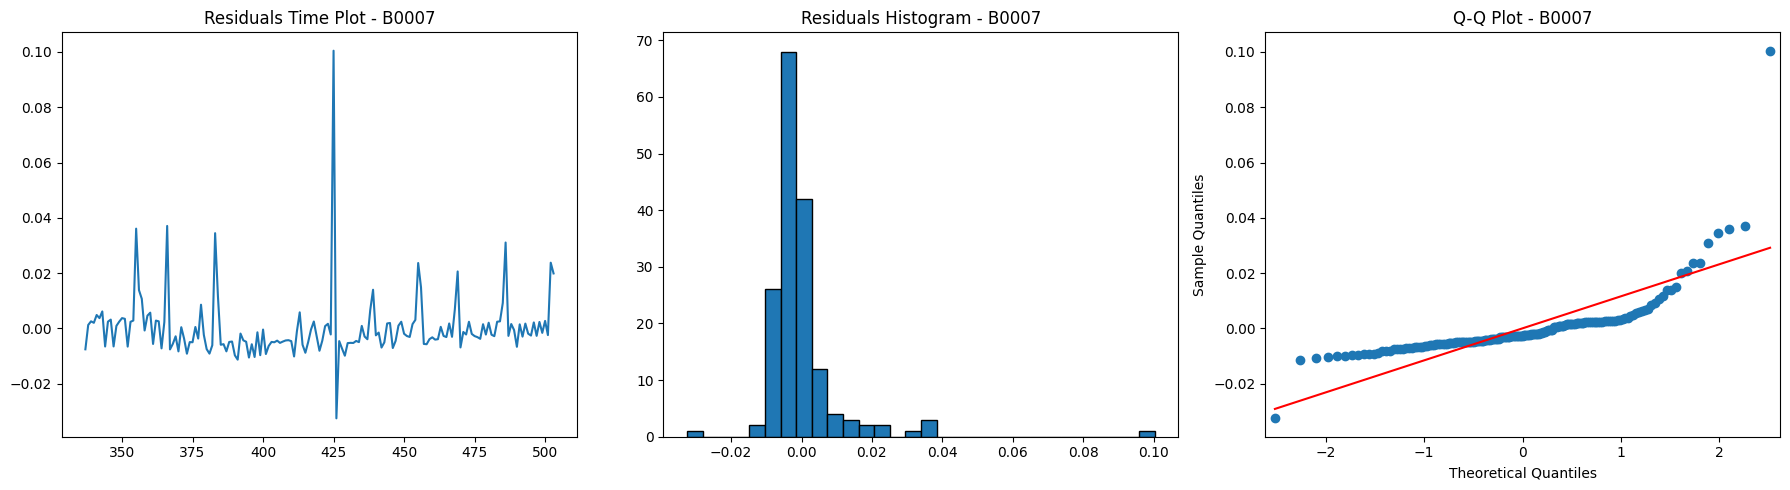


Residual Tests for B0007
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)
0.9997797249591833

Fitting ARIMA(3, 0, 2) for Battery B0018
Model fitted for B0018
Model saved for B0018


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

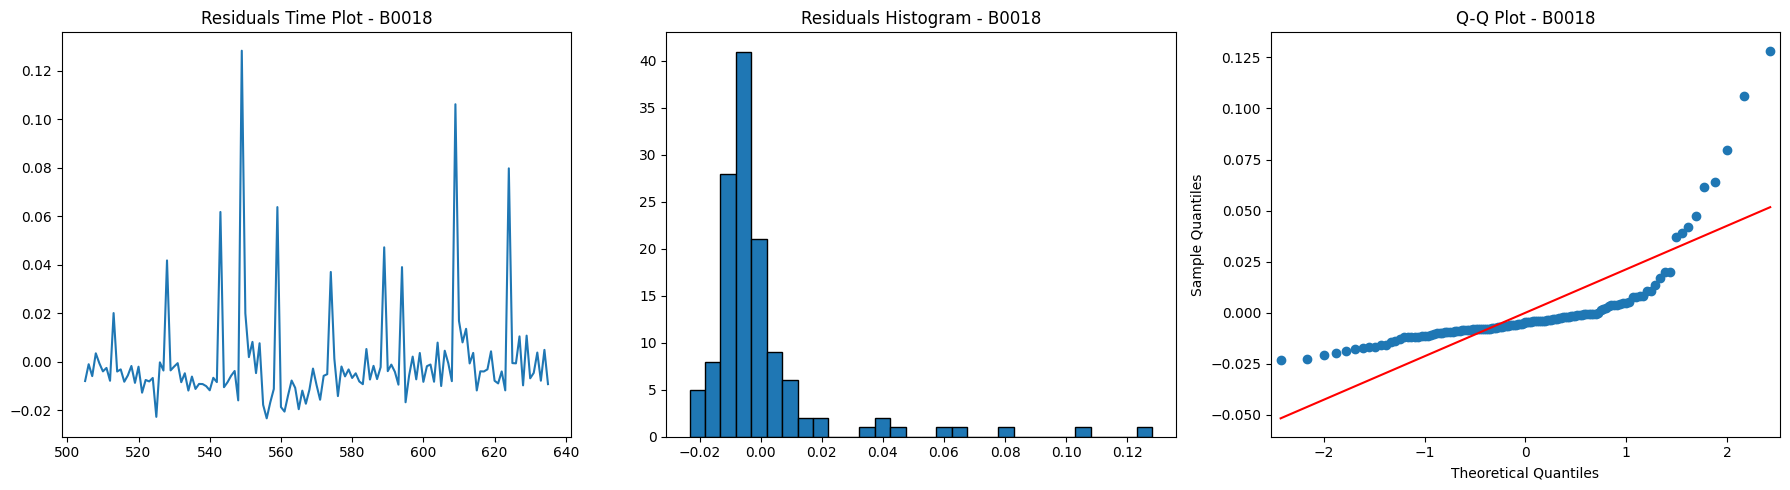


Residual Tests for B0018
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)
0.4475860551737052


In [101]:
# Loop through each battery, fit model, plot residuals, perform tests

for battery_id in sample_batteries:
    temp = discharge_df[discharge_df['battery_id'] == battery_id]
    
    series = temp['capacity_diff'].dropna()
    order = manual_orders[battery_id]
    
    print(f"\nFitting ARIMA{order} for Battery {battery_id}")
    model_fit = fit_arima_model(series, order, battery_id)
    
    plot_residuals_diagnostics(model_fit, battery_id)
    residual_tests(model_fit, battery_id)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

battery_id = 'B0018'

temp = discharge_df[discharge_df['battery_id'] == battery_id]
series = temp['Capacity'].dropna().reset_index(drop=True)

model_orders = [(2,1,2), (3,1,2), (3,1,3)]

model_results = []

for order in model_orders:
    print(f"Fitting ARIMA{order} for Battery {battery_id}...")
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    
    model_results.append({
        'Order': f'ARIMA{order}',
        'AIC': model_fit.aic,
        'BIC': model_fit.bic,
        'Log-Likelihood': model_fit.llf
    })


Fitting ARIMA(2, 1, 2) for Battery B0018...
Fitting ARIMA(3, 1, 2) for Battery B0018...
Fitting ARIMA(3, 1, 3) for Battery B0018...


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
results_df = pd.DataFrame(model_results)

results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print(results_df)


            Order         AIC         BIC  Log-Likelihood
0  ARIMA(3, 1, 2) -628.756861 -611.505677      320.378431
1  ARIMA(3, 1, 3) -622.042734 -601.916352      318.021367
2  ARIMA(2, 1, 2) -617.127663 -602.751676      313.563832


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


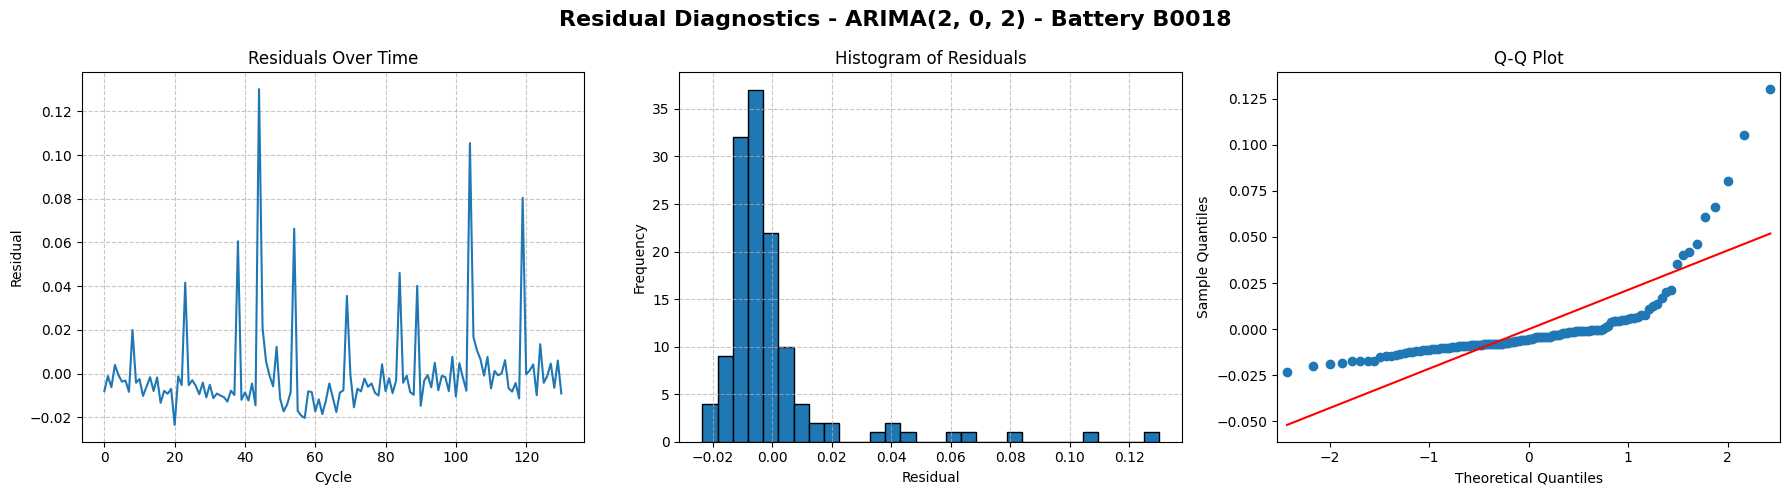

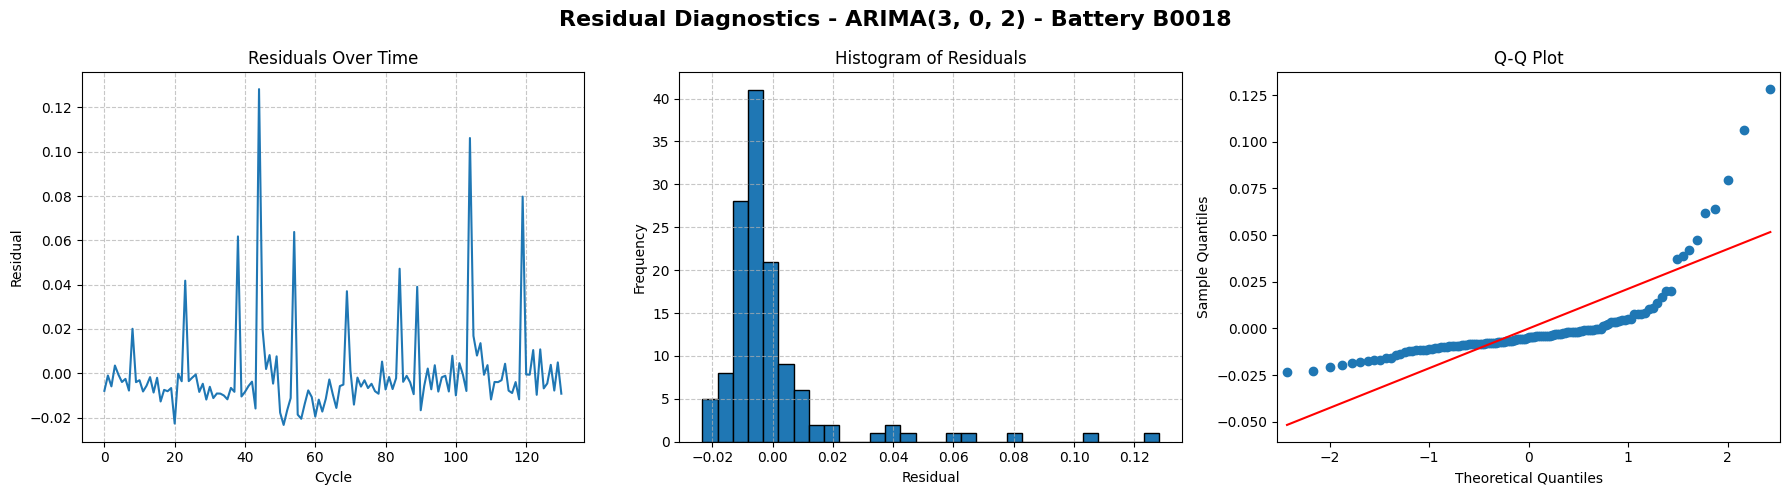

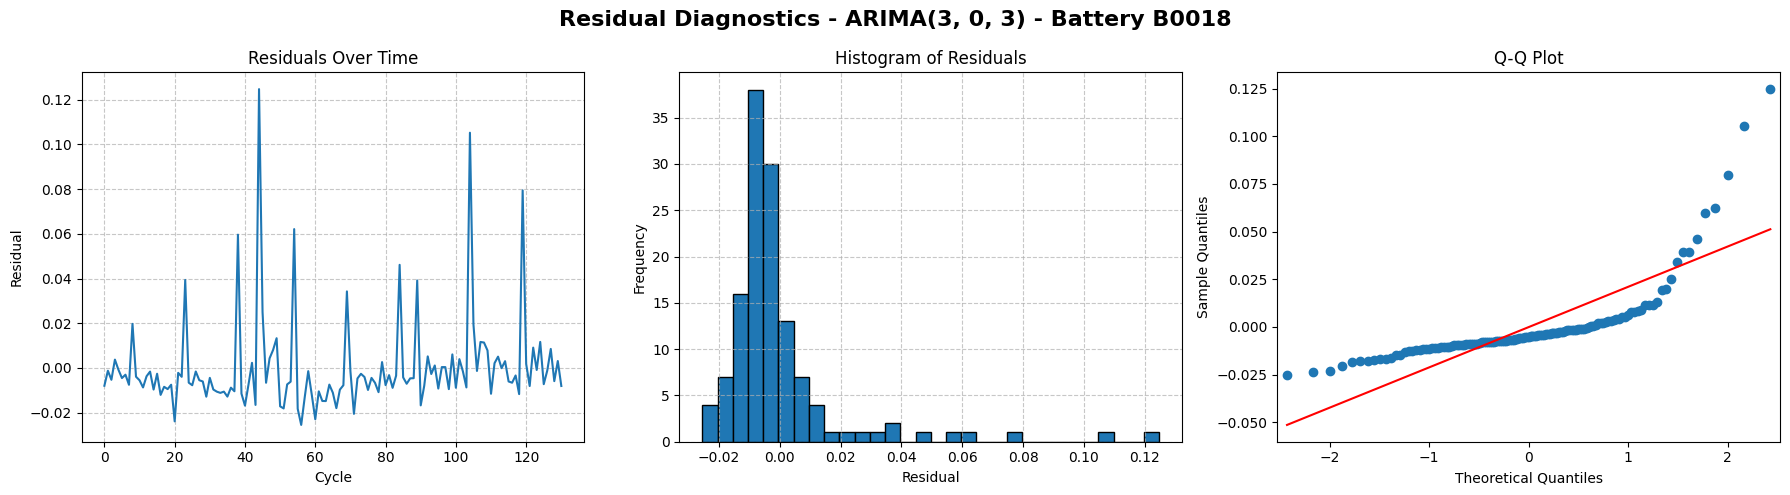

In [98]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

battery_id = 'B0018'
temp = discharge_df[discharge_df['battery_id'] == battery_id]
series = temp['capacity_diff'].dropna().reset_index(drop=True)

model_orders = [(2,0,2), (3,0,2), (3,0,3)]

fitted_models = {}

for order in model_orders:
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    fitted_models[f'ARIMA{order}'] = model_fit

for model_name, model_fit in fitted_models.items():
    residuals = model_fit.resid.dropna()
    
    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    fig.suptitle(f'Residual Diagnostics - {model_name} - Battery {battery_id}', fontsize=16, fontweight='bold')
    
    axes[0].plot(residuals)
    axes[0].set_title('Residuals Over Time')
    axes[0].set_xlabel('Cycle')
    axes[0].set_ylabel('Residual')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    axes[1].hist(residuals, bins=30, edgecolor='black')
    axes[1].set_title('Histogram of Residuals')
    axes[1].set_xlabel('Residual')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    sm.qqplot(residuals, line='s', ax=axes[2])
    axes[2].set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()


In [102]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_residuals_acf_pacf(model_fit, lags=40, battery_id=None, model_name=None):
    residuals = model_fit.resid.dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(f'Residual ACF and PACF - {model_name} - {battery_id}', fontsize=16, fontweight='bold')

    plot_acf(residuals, lags=lags, ax=axes[0])
    axes[0].set_title('ACF of Residuals')

    plot_pacf(residuals, lags=lags, ax=axes[1])
    axes[1].set_title('PACF of Residuals')

    plt.tight_layout()
    plt.show()
